In [1]:
%run ml_header.py

# Linear Regression

$\widehat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_nx_n$

$\widehat{y}=h_\theta(x)=\theta^T\cdot x$

- $\widehat{y}$: the predicted value
- $n$: the number of features
- $x_i$: the $i^{th}$ feature value
- $\theta_j$: the $j^th$ model parameter
- $h_\theta$: the hypothesis function, using the model parameter $\theta$

## Mean Square Error

$MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^m(\theta^T\cdot x^{(i)}-y^{(i)})^2$

## The Normal Equation

$\widehat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$
- $y$: the vector of target values containing $y^{(1)}$ to $y^{(m)}$

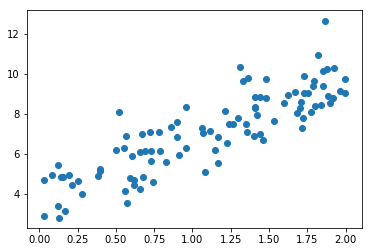

In [2]:
# An example
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # noise
plt.scatter(X, y)
plt.show()

In [3]:
# Use normal equation
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each sample
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best # supposed to be [4, 3]

array([[ 3.80892839],
       [ 2.98099418]])

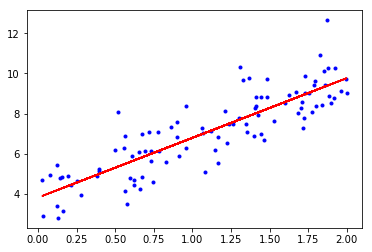

In [5]:
# Plot the approximation line
plt.plot(X, y, 'b.')
plt.plot(X, X_b.dot(theta_best), 'r-')
plt.show()

In [6]:
# Using Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# The hyperparameters
lin_reg.intercept_, lin_reg.coef_

(array([ 3.80892839]), array([[ 2.98099418]]))

## Gradient Descent

### Batch Gradient Decent

Partial derivatives of the cost function.

$\frac{\partial}{\partial \theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot x^{(i)}-y^{(i)})x_j^{(i)}$

Gradient vector of the cost function.

$\Delta_\theta MSE(\theta)=\frac{2}{m}X^T\cdot (X\cdot \theta-y)$

> Training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

Gradient Descent step

$\theta^{(next step)}=\theta-\eta\Delta_\theta MSE(\theta)$
- $\eta$: the learning rate

In [8]:
# Implementation of Batch Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random initialization
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta

array([[ 3.80892839],
       [ 2.98099418]])

### Stochastic Gradient Descent

*Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based only on that single instance.
- It's an out-of-core algorithm.
- The cost function will bounce up and down.
- Once the algorithm stops, the final parameter values are good, but not optimal.
- It can jump out of local minima.

In [10]:
# Implementation of Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning scheduling hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs): # 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [11]:
theta

array([[ 3.84878737],
       [ 2.9903125 ]])

In [12]:
# Use Scikit Learn
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # flatterning y

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.83741007]), array([ 3.02437488]))

### Mini-batch Gradient Descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

# Polynomial Regression

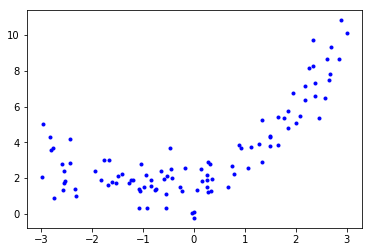

In [14]:
# An example
m = 100
X = 6 * np.random.rand(m, 1) - 3
# y = 0.5 * X * X + X + 2 + Gaussian noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')
plt.show()

In [15]:
# Add 2nd-order features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[ 1.80213684] [[ 1.00085947  0.54023014]]


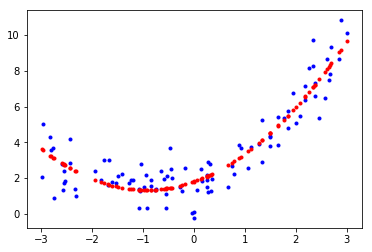

In [17]:
print(lin_reg.intercept_, lin_reg.coef_)

plt.plot(X, y, 'b.')
plt.plot(X, lin_reg.predict(X_poly), 'r.')
plt.show()

# Learning Curve

It's a plot of the model's performance on the training set and the validation set as a function of the training set size.

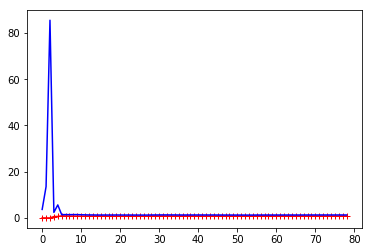

In [18]:
plot_learning_curve(lin_reg, X_poly, y)

On training data:
- The model fits perfectly when there are just one or two samples in the training set, which is why the curve starts at zero.
- But as new samples are added to the training set, it becomes impossible for the model to fit the training data perfectly.
- The error goes up until it reaches a plateau, at which point adding new samples to the training set doesn't make the average error much better or worse.

On validation set:
- When the model is trained on very few training instances, it's incapable of generalizing properly, which is why the validation error is initially quite big.
- As the model is shown more samples, it learns and thus the validation error slowly goes down.
- The model cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

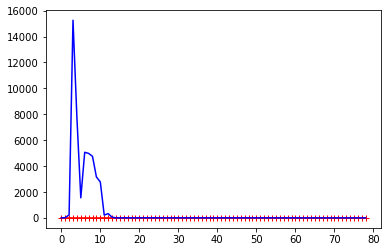

In [19]:
# Add 10th-order features
poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X)
# The learning curve of 10th degree
plot_learning_curve(lin_reg, X_poly_10, y)

- Bias: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
- Variance: This part is due to the model's excessive sensitivity to small variations in the trianing data. A model with many degrees of freedom is likely to have high variance, and thus to overfit the training data.
- Irreducible error: This part is due to the noisiness of the data itself. The only way is to reduce this part of the error is to clean up the data (e.g., fix the data sources, such broken sensors, or detect and remove outliers).

# Regularized Linear Models

For a linear model, regularization is typically achieved by constraining the weights of the model.
- Ridge Regression
- Lasso Regression
- Elastic Net

Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

## Ridge Regression

*Ridge Regression* (also called *Tikhonov regularization*) is a regularized version of Linear Regression: a *regularization term* equal to $\alpha\sum_{i=1}^n\theta_i^2$ is added to the cost function.

Ridge Regression cost function

$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$

> It is important to scale the data before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Ridge Regression closed-form solution

$\widehat{\theta}=(X^T\cdot X+\alpha A)^{-1}\cdot X^T\cdot y$

In [20]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_poly, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

[ 1.80408629] [[ 0.99748345  0.53956188]]


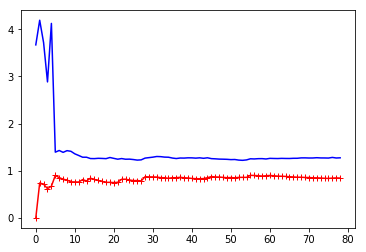

In [21]:
print(ridge_reg.intercept_, ridge_reg.coef_)
plot_learning_curve(ridge_reg, X_poly, y)

## Lasso Regression

*Least Absolute Shrinkage and Selection Operator Regression* (simply called *Lasso Regression*) is another regularized version of Linear Regression.

Lasso Regression cost function

$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^n|\theta_i|$

In [22]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

[ 1.83917696] [ 0.96715678  0.52758108]


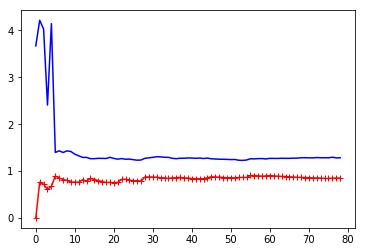

In [23]:
print(lasso_reg.intercept_, lasso_reg.coef_)
plot_learning_curve(lasso_reg, X_poly, y)

## Elastic Net

*Elastic Net* is a middle ground between Ridge Regression and Lasso Regression.

Elastic Net cost function

$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$

In [24]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_poly, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

[ 1.83024971] [ 0.96763427  0.53061762]


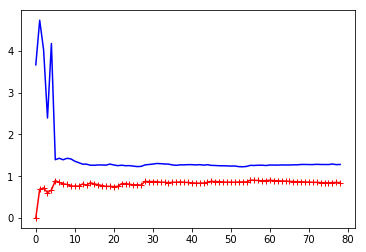

In [25]:
print(elastic_net.intercept_, elastic_net.coef_)
plot_learning_curve(elastic_net, X_poly, y)

## Options Rule

- Ridge is a good default.
- If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net, since they tend to reduce the useless features' weights down to zero.
- In general, Elastic Net is preferred over Lasso, since Lasso may behave erratically when the number of features is greater than the number of training samples or when several features are strongly correlated.